# Using NLP to categorize the all known debunked rumours
The following notebook shows a functional method to categorize all rumours that have been proven to be true or false as of the completion of this research into the 10 categories agreed to by Reuters.

In [150]:
import pandas as pd
df = pd.read_json('debunk.json', encoding='utf-8')

In [153]:
df.head()

,Claim,Country,Date,Debunk_Date,Explaination,Factcheck_Org,Label,Link,Source,Source_Lang
0,\n Chinese state media claims Ghana’s coronavi...,Ghana,2020-04-13,2020/04/13,Official Ghana government data contradicts the...,GhanaFact,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://ghanafact.com/false-chinese-state-medi...,en
1,\n Video: Migrant labourers in Kerala gambling...,India,2020-04-11,2020/04/11,An old and unrelated video is used to make the...,FactCrescendo,FALSE,https://www.poynter.org/?ifcn_misinformation=v...,https://www.malayalam.factcrescendo.com/old-an...,ml
2,\n Coronavirus can be avoided by eating nigell...,India,2020-04-11,2020/04/11,Hydroxychloroquine is not present in the subst...,Newschecker,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://www.newschecker.in/article/news-detail...,hi
3,\n ICMR issued a report claiming the number of...,India,2020-04-11,2020/01/01,ICMR did not publish any such report about the...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=i...,https://www.facebook.com/groups/dsdrss/permali...,en
4,\n Sanitize masks by microwaving them for 2-3 ...,Colombia,2020-04-11,2020/04/15,Fabric masks should not be sanitized by microw...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=s...,https://www.vishvasnews.com/english/health/fac...,hi


Before further work, the data needs to be preprocessed.

In [25]:
#df_new = df[df.Source_Lang.eq('en')].copy() #only use English-based rumours
df_new = df.copy()
df_new['Claim'] = df_new['Claim'].str.replace(r'[_\W\d]',' ')
df_new.reindex()
df_new.head()

,Claim,Country,Date,Debunk_Date,Explaination,Factcheck_Org,Label,Link,Source,Source_Lang
0,Chinese state media claims Ghana s coronavir...,Ghana,2020-04-13,2020/04/13,Official Ghana government data contradicts the...,GhanaFact,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://ghanafact.com/false-chinese-state-medi...,en
1,Video Migrant labourers in Kerala gambling ...,India,2020-04-11,2020/04/11,An old and unrelated video is used to make the...,FactCrescendo,FALSE,https://www.poynter.org/?ifcn_misinformation=v...,https://www.malayalam.factcrescendo.com/old-an...,ml
2,Coronavirus can be avoided by eating nigella...,India,2020-04-11,2020/04/11,Hydroxychloroquine is not present in the subst...,Newschecker,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://www.newschecker.in/article/news-detail...,hi
3,ICMR issued a report claiming the number of ...,India,2020-04-11,2020/01/01,ICMR did not publish any such report about the...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=i...,https://www.facebook.com/groups/dsdrss/permali...,en
4,Sanitize masks by microwaving them for m...,Colombia,2020-04-11,2020/04/15,Fabric masks should not be sanitized by microw...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=s...,https://www.vishvasnews.com/english/health/fac...,hi


In [99]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import string
import gensim
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

porter = PorterStemmer()
lan_porter = LancasterStemmer()
stop_words = set(stopwords.words('english'))
clean_content=[]
i = 0
for content in df_new['Claim']:
    #turn string into tokens
    word_tokens = word_tokenize(content)
    words = [porter.stem(wordnet_lemmatizer.lemmatize(w.lower())) for w in word_tokens if w not in stop_words] #remove stop words
    #lowercase, remove stop words and punctuation/numbers
    clean_content.append( [w for w in words if len(w) > 3] ) 
clean_content

[['chines',
  'state',
  'medium',
  'claim',
  'ghana',
  'coronaviru',
  'case',
  'surpass',
  'death'],
 ['video',
  'migrant',
  'labour',
  'kerala',
  'gambl',
  'huge',
  'stash',
  'cash',
  'amid',
  'lockdown'],
 ['coronaviru',
  'avoid',
  'nigella',
  'honey',
  'contain',
  'hydroxychloroquin',
  'hydroxychloroquin',
  'treat',
  'coronaviru'],
 ['icmr',
  'issu',
  'report',
  'claim',
  'number',
  'peopl',
  'infect',
  'thte',
  'coronaviru',
  'increas',
  'lakh',
  'india',
  'announc',
  'lockdown'],
 ['sanit', 'mask', 'microwav', 'minut'],
 ['hindu', 'rajasthan', 'kill', 'muslim', 'amidst', 'lockdown'],
 ['israel',
  'death',
  'covid',
  'made',
  'lemon',
  'bicarbon',
  'cure',
  'coronaviru'],
 ['mustard', 'kill', 'coronaviru'],
 ['imran', 'khan', 'wife', 'test', 'posit', 'covid'],
 ['poster',
  'allegedli',
  'contain',
  'guidelin',
  'covid',
  'issu',
  'ministri',
  'health',
  'famili',
  'welfar',
  'india'],
 ['whatsapp',
  'forward',
  'along',
  'vid

In [100]:
from gensim.utils import simple_preprocess

#alternative way
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def strip_newline(series):
    return [review.replace('\n','') for review in series]

df['Claim'] = strip_newline(df['Claim'])
words = list(sent_to_words(df['Claim']))
words = remove_stopwords(words)
bigram = bigrams(words)
bigram = [bigram[review] for review in words]
words = sent_to_words(m)

In [101]:
import gensim
import gensim.corpora as corpora
dictionary = gensim.corpora.Dictionary(clean_content)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [102]:
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]

In [103]:
for i in range(len(bow_corpus[0])):
    print("Word {} (\"{}\") appears {} time.".format(bow_corpus[0][i][0], 
                                                     dictionary[bow_corpus[0][i][0]], 
                                                     bow_corpus[0][i][1]))

Word 0 ("case") appears 1 time.
Word 1 ("chines") appears 1 time.
Word 2 ("claim") appears 1 time.
Word 3 ("death") appears 1 time.
Word 4 ("medium") appears 1 time.
Word 5 ("state") appears 1 time.


In [107]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 30, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [108]:
topics = []
for idx, topic in lda_model.print_topics(-1):
    topics.append(topic)
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.284*"cure" + 0.060*"develop" + 0.056*"garlic" + 0.053*"medicin" + 0.050*"vaccin" + 0.040*"treat" + 0.036*"boil" + 0.035*"scientist" + 0.033*"water" + 0.029*"prevent"


Topic: 1 
Words: 0.423*"infect" + 0.056*"prevent" + 0.051*"south" + 0.040*"high" + 0.039*"spread" + 0.036*"novel" + 0.034*"rate" + 0.034*"vitamin" + 0.031*"korea" + 0.021*"stop"


Topic: 2 
Words: 0.174*"test" + 0.108*"posit" + 0.092*"caus" + 0.054*"presid" + 0.050*"state" + 0.037*"former" + 0.034*"hous" + 0.034*"famili" + 0.033*"north" + 0.033*"governor"


Topic: 3 
Words: 0.227*"viru" + 0.119*"said" + 0.065*"chines" + 0.058*"human" + 0.048*"wuhan" + 0.040*"anim" + 0.030*"live" + 0.029*"scientist" + 0.025*"china" + 0.024*"creat"


Topic: 4 
Words: 0.108*"mask" + 0.068*"person" + 0.048*"wear" + 0.044*"take" + 0.044*"face" + 0.042*"patent" + 0.037*"franc" + 0.031*"blood" + 0.029*"ibuprofen" + 0.029*"donat"


Topic: 5 
Words: 0.130*"show" + 0.124*"itali" + 0.120*"photo" + 0.103*"wuhan" + 0.064*"china" + 

In [165]:
import numpy as np
m = lda_model.get_document_topics(bow_corpus)
matches = np.zeros(30)
data = []
for i in range(len(m)):
    prob_topics = m[i]
    if prob_topics:
        matches[prob_topics[0][0]] += 1
        topics.sort(key=lambda x: x[1], reverse=True)
        data.append([df_new['Claim'][i], prob_topics[0][0], topics[prob_topics[0][0]] ])
        print("Claim {} matches topic {} with keywords {}".format(data[-1][0], data[-1][1], data[-1][2]))
        print("\n")
#m.sort(key=lambda x: x[1], reverse=True)

Claim   Chinese state media claims Ghana s coronavirus cases have surpassed        with over     deaths    matches topic 11 with keywords 0.109*"report" + 0.071*"author" + 0.070*"test" + 0.062*"messag" + 0.059*"medium" + 0.047*"cold" + 0.047*"warn" + 0.046*"social" + 0.038*"accord" + 0.038*"news"


Claim   Video  Migrant labourers in Kerala gambling with huges stashes of cash amid lockdown    matches topic 15 with keywords 0.113*"govern" + 0.085*"lockdown" + 0.064*"spain" + 0.057*"state" + 0.044*"indian" + 0.039*"money" + 0.033*"brazil" + 0.028*"unit" + 0.022*"isol" + 0.022*"brazilian"


Claim   Coronavirus can be avoided by eating nigella with honey as it contains      hydroxychloroquine  Hydroxychloroquine treats coronavirus    matches topic 0 with keywords 0.284*"cure" + 0.060*"develop" + 0.056*"garlic" + 0.053*"medicin" + 0.050*"vaccin" + 0.040*"treat" + 0.036*"boil" + 0.035*"scientist" + 0.033*"water" + 0.029*"prevent"


Claim   ICMR issued a report claiming the number of people i

Claim   Muslim League Bangladesh party leader s son Janab Muhammed Abdul Alam donates     cr to CH charitable trust works under Muslim League    matches topic 22 with keywords 0.149*"italian" + 0.061*"give" + 0.060*"doctor" + 0.052*"claim" + 0.051*"treatment" + 0.048*"come" + 0.045*"free" + 0.044*"book" + 0.042*"viral" + 0.032*"discov"


Claim   Leonardo Da Vinci Hospital  a COVID    reference hospital in Fortaleza  Brazil  is empty  A video  proves  there was no one at the areas open to the public    matches topic 15 with keywords 0.113*"govern" + 0.085*"lockdown" + 0.064*"spain" + 0.057*"state" + 0.044*"indian" + 0.039*"money" + 0.033*"brazil" + 0.028*"unit" + 0.022*"isol" + 0.022*"brazilian"


Claim   American citizens have placed a nude statue of President Donald Trump in New York City because he failed to handle the coronavirus situation in USA    matches topic 8 with keywords 0.117*"home" + 0.100*"quarantin" + 0.070*"citizen" + 0.067*"stay" + 0.059*"releas" + 0.044*"lion" + 0.037

Claim   A video says weed kills coronavirus    matches topic 0 with keywords 0.284*"cure" + 0.060*"develop" + 0.056*"garlic" + 0.053*"medicin" + 0.050*"vaccin" + 0.040*"treat" + 0.036*"boil" + 0.035*"scientist" + 0.033*"water" + 0.029*"prevent"


Claim   Video of Wuhan market where the new coronavirus started to spread    matches topic 5 with keywords 0.130*"show" + 0.124*"itali" + 0.120*"photo" + 0.103*"wuhan" + 0.064*"china" + 0.061*"video" + 0.045*"outbreak" + 0.041*"market" + 0.029*"street" + 0.025*"coffin"


Claim   Vitamin C and warm water with lemon can prevent COVID       matches topic 13 with keywords 0.136*"water" + 0.082*"india" + 0.060*"salt" + 0.052*"gargl" + 0.051*"warm" + 0.046*"prevent" + 0.046*"drink" + 0.041*"vinegar" + 0.039*"lockdown" + 0.035*"kill"


Claim   Chinese people convert to Islam because of COVID       matches topic 0 with keywords 0.284*"cure" + 0.060*"develop" + 0.056*"garlic" + 0.053*"medicin" + 0.050*"vaccin" + 0.040*"treat" + 0.036*"boil" + 0.035*"sc


Claim   A statue of the Virgin Mary from Loreto will be carried by a plane over Italy to ask for the pandemic of COVID    to stop    matches topic 5 with keywords 0.130*"show" + 0.124*"itali" + 0.120*"photo" + 0.103*"wuhan" + 0.064*"china" + 0.061*"video" + 0.045*"outbreak" + 0.041*"market" + 0.029*"street" + 0.025*"coffin"


Claim   Army to be deployed to respond to COVID    pandemic    matches topic 0 with keywords 0.284*"cure" + 0.060*"develop" + 0.056*"garlic" + 0.053*"medicin" + 0.050*"vaccin" + 0.040*"treat" + 0.036*"boil" + 0.035*"scientist" + 0.033*"water" + 0.029*"prevent"


Claim   One Polish telecommunications company used the quarantine as a cover up to put      G antennas in Gdynia    matches topic 21 with keywords 0.093*"disinfect" + 0.089*"year" + 0.067*"spray" + 0.052*"militari" + 0.050*"helicopt" + 0.048*"compani" + 0.040*"week" + 0.040*"stop" + 0.036*"away" + 0.033*"crisi"


Claim   A WhatsApp forward claimed that a vaccine for coronavirus has been discovered and tha

Claim   Chinese police crack down on suspected coronavirus patients    matches topic 19 with keywords 0.156*"polic" + 0.147*"arrest" + 0.094*"chines" + 0.044*"infect" + 0.040*"offici" + 0.038*"spread" + 0.027*"video" + 0.024*"viru" + 0.023*"patient" + 0.023*"weapon"


Claim   A video shows Italians or French people singing Madonna  Katy Perry  Britney Spears or Aya Nakamura songs on their balcony because of the lockdown measure in France and Italy    matches topic 5 with keywords 0.130*"show" + 0.124*"itali" + 0.120*"photo" + 0.103*"wuhan" + 0.064*"china" + 0.061*"video" + 0.045*"outbreak" + 0.041*"market" + 0.029*"street" + 0.025*"coffin"


Claim   The ice skating rink in Mulhouse will be used as a morgue    matches topic 0 with keywords 0.284*"cure" + 0.060*"develop" + 0.056*"garlic" + 0.053*"medicin" + 0.050*"vaccin" + 0.040*"treat" + 0.036*"boil" + 0.035*"scientist" + 0.033*"water" + 0.029*"prevent"


Claim   An official decree taken by the government says the military will have to



Claim   The coronavirus is more dangerous for animals than for humans    matches topic 3 with keywords 0.227*"viru" + 0.119*"said" + 0.065*"chines" + 0.058*"human" + 0.048*"wuhan" + 0.040*"anim" + 0.030*"live" + 0.029*"scientist" + 0.025*"china" + 0.024*"creat"


Claim   A video shows people storming an Aldi supermarket to buy groceries because of coronavirus fear    matches topic 12 with keywords 0.252*"case" + 0.093*"there" + 0.086*"confirm" + 0.049*"ecuador" + 0.046*"supermarket" + 0.039*"hospit" + 0.028*"diagnos" + 0.026*"outsid" + 0.024*"state" + 0.023*"health"


Claim   This virus must be old because the label on a bottle of disinfectant from      shows  coronavirus     matches topic 3 with keywords 0.227*"viru" + 0.119*"said" + 0.065*"chines" + 0.058*"human" + 0.048*"wuhan" + 0.040*"anim" + 0.030*"live" + 0.029*"scientist" + 0.025*"china" + 0.024*"creat"


Claim   Local news channel in Ecuador confirms more people are infected with coronavirus    matches topic 1 with keywords 


Claim   Statistics are predicting millions of dead people and billions of infected people in a few days    matches topic 1 with keywords 0.423*"infect" + 0.056*"prevent" + 0.051*"south" + 0.040*"high" + 0.039*"spread" + 0.036*"novel" + 0.034*"rate" + 0.034*"vitamin" + 0.031*"korea" + 0.021*"stop"


Claim    Japan has sent many masks to Wuhan  China  But China hasn t supported Japan ever before     matches topic 4 with keywords 0.108*"mask" + 0.068*"person" + 0.048*"wear" + 0.044*"take" + 0.044*"face" + 0.042*"patent" + 0.037*"franc" + 0.031*"blood" + 0.029*"ibuprofen" + 0.029*"donat"


Claim   A team from  WorldPopProject has heat mapped the highest risk counties for the  Wuhancoronavirus   Japan is the second country in the list because Abe s administration doesn t enforce immigration restrictions     matches topic 14 with keywords 0.092*"video" + 0.069*"spread" + 0.068*"muslim" + 0.067*"countri" + 0.065*"bodi" + 0.062*"show" + 0.060*"dead" + 0.055*"victim" + 0.037*"chines" + 0.036*"

In [168]:
claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
claim2topic.head()

,Claim,Topic,TopicKeyWords
0,Chinese state media claims Ghana s coronavir...,11,"0.109*""report"" + 0.071*""author"" + 0.070*""test""..."
1,Video Migrant labourers in Kerala gambling ...,15,"0.113*""govern"" + 0.085*""lockdown"" + 0.064*""spa..."
2,Coronavirus can be avoided by eating nigella...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
3,ICMR issued a report claiming the number of ...,1,"0.423*""infect"" + 0.056*""prevent"" + 0.051*""sout..."
4,Sanitize masks by microwaving them for m...,4,"0.108*""mask"" + 0.068*""person"" + 0.048*""wear"" +..."


In [169]:
claim2topic[claim2topic['Topic']==0].head()

,Claim,Topic,TopicKeyWords
2,Coronavirus can be avoided by eating nigella...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
6,Israel has no deaths from COVID tea made...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
7,Mustard oil can kill coronavirus,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
8,Pak PM Imran Khan s wife tested positive for...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
14,Industrialist Ratan Tata s view on economic ...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."


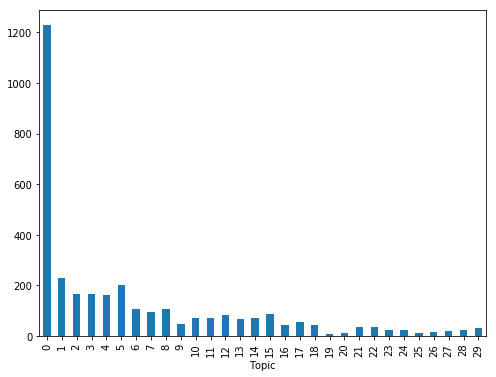

In [170]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
claim2topic.groupby('Topic').Claim.count().plot.bar(ylim=0)
plt.show()

let's make a function so it's easier to experiment and visualise correctness

In [190]:
def train_model(clean_content, num_topics=30, filter_b = 15, filter_a = 0.1):
    dictionary = gensim.corpora.Dictionary(clean_content)
    dictionary.filter_extremes(no_below=filter_b, no_above=filter_a, keep_n= 100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = num_topics, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2)
    topics = []
    for idx, topic in lda_model.print_topics(-1):
        topics.append(topic)
    m = lda_model.get_document_topics(bow_corpus)
    matches = np.zeros(30)
    data = []
    for i in range(len(m)):
        prob_topics = m[i]
        if prob_topics:
            matches[prob_topics[0][0]] += 1
            topics.sort(key=lambda x: x[1], reverse=True)
            data.append([df_new['Claim'][i], prob_topics[0][0], topics[prob_topics[0][0]] ])
    claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
    return claim2topic
#m.sort(key=lambda x: x[1], reverse=True)

In [134]:
#df_copy = df[['Claim', 'Explaination', 'Label', 'Source_Lang']].copy()
#df_copy.to_excel('debunk_label.xlsx')

In [172]:
rumours_labelled = pd.read_excel('debunk_label.xlsx')
rumours_labelled.drop(['Topics'], axis=1)
rumours_labelled.dropna()

,Column1,Claim,Explaination,Label,Source_Lang,Category,Topics
0,0,Chinese state media claims Ghana’s coronaviru...,Official Ghana government data contradicts the...,FALSE,en,Community spread and impact,"Public authority actions, policy, and communic..."
2,2,Coronavirus can be avoided by eating nigella ...,Hydroxychloroquine is not present in the subst...,FALSE,hi,"Vaccines, medical treatments, and tests",Medical advice and self-treatments
3,3,ICMR issued a report claiming the number of p...,ICMR did not publish any such report about the...,FALSE,en,Community spread and impact,Claims about prominent actors
4,4,Sanitize masks by microwaving them for 2-3 mi...,Fabric masks should not be sanitized by microw...,FALSE,hi,"Vaccines, medical treatments, and tests",Conspiracy theories
5,5,Hindu man in Rajasthan killed by Muslims amid...,The video is originally from Pakistan where a ...,FALSE,en,"Public preparedness, protests, and civil disob...",Virus transmission
6,6,Israel has no deaths from COVID-19; tea made ...,The post claiming Israel has no deaths from CO...,FALSE,hi,"Vaccines, medical treatments, and tests",Virus origin and properties
7,7,Mustard oil can kill coronavirus.\t\t,"No, Mustard oil cannot cure coronavirus; howev...",FALSE,hi,"Vaccines, medical treatments, and tests","Public preparedness, protests, and civil disob..."
8,8,Pak PM Imran Khan’s wife tested positive for ...,Morphed newscard of popular Indian news channe...,FALSE,ml,Claims about prominent actors,"Vaccines, medical treatments, and tests"


In [175]:
rumours_labelled.shape

(3345, 7)

In [181]:
claim2topic[rumours_labelled['Category'] == 'Medical advice and self-treatments']

,Claim,Topic,TopicKeyWords
19,Mustard oil can kill coronavirus,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
27,Israel has no deaths from COVID tea made...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
45,The new coronavirus pH varies from to ...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
231,Homemade masks prevent the spread of coronav...,27,"0.112*""chines"" + 0.102*""minist"" + 0.098*""preve..."
1412,Andhra Pradesh Chief Minister YS Jagan Reddy...,11,"0.109*""report"" + 0.071*""author"" + 0.070*""test""..."
1915,Research made by scientists from the Univers...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."


In [182]:
rumours_labelled[claim2topic['Topic']==0]

,Column1,Claim,Explaination,Label,Source_Lang,Category,Topics
2,2,Coronavirus can be avoided by eating nigella ...,Hydroxychloroquine is not present in the subst...,FALSE,hi,"Vaccines, medical treatments, and tests",Medical advice and self-treatments
6,6,Israel has no deaths from COVID-19; tea made ...,The post claiming Israel has no deaths from CO...,FALSE,hi,"Vaccines, medical treatments, and tests",Virus origin and properties
7,7,Mustard oil can kill coronavirus.\t\t,"No, Mustard oil cannot cure coronavirus; howev...",FALSE,hi,"Vaccines, medical treatments, and tests","Public preparedness, protests, and civil disob..."
8,8,Pak PM Imran Khan’s wife tested positive for ...,Morphed newscard of popular Indian news channe...,FALSE,ml,Claims about prominent actors,"Vaccines, medical treatments, and tests"
14,14,Industrialist Ratan Tata’s view on economic d...,The quote on economical downfall due to COVID-...,FALSE,en,Claims about prominent actors,NaN
17,17,Coffee can cure Covid-19.\t\t,There is no scientific evidence that coffee ca...,False,es,NaN,NaN
19,19,Mustard oil can kill coronavirus.\t\t,"No, mustard oil cannot cure coronavirus; howev...",FALSE,en,Medical advice and self-treatments,NaN
23,23,Eminent Indian Bengali Chemist Dr. Prafulla C...,The first known use of quinine is from 17th ce...,FALSE,ml,NaN,NaN
24,24,Kenya Government hired the warriors of Maasai...,The government of Kenya did not hire the warri...,FALSE,hi,NaN,NaN
25,25,"Dr. Vandana Tiwari, part of the team investig...",Dr. Vandana Tiwari is actually from the Indian...,FALSE,en,NaN,NaN


In [183]:
claim2topic[rumours_labelled['Category'] == 'Vaccines, medical treatments, and tests']

,Claim,Topic,TopicKeyWords
2,Coronavirus can be avoided by eating nigella...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
4,Sanitize masks by microwaving them for m...,4,"0.108*""mask"" + 0.068*""person"" + 0.048*""wear"" +..."
6,Israel has no deaths from COVID tea made...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
7,Mustard oil can kill coronavirus,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
1187,A WhatsApp forward claims that the COVID ...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
2363,President Donald Trump tweeted Coronavirus...,5,"0.130*""show"" + 0.124*""itali"" + 0.120*""photo"" +..."
2373,Israel creates a vaccine for the coronavirus,10,"0.120*""hour"" + 0.086*""whatsapp"" + 0.062*""food""..."
2374,Dr Lupita Yamamoto has found a vaccine that...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."
2397,Israel creates a vaccine for the coronavirus,10,"0.120*""hour"" + 0.086*""whatsapp"" + 0.062*""food""..."
2398,Dr Lupita Yamamoto has found a vaccine that...,0,"0.284*""cure"" + 0.060*""develop"" + 0.056*""garlic..."


In [194]:
claim2topic20 = train_model(clean_content, num_topics=20)

In [195]:
claim2topic20[rumours_labelled['Category'] == 'Vaccines, medical treatments, and tests']

,Claim,Topic,TopicKeyWords
2,Coronavirus can be avoided by eating nigella...,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
4,Sanitize masks by microwaving them for m...,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
6,Israel has no deaths from COVID tea made...,16,"0.207*""cure"" + 0.100*""test"" + 0.079*""imag"" + 0..."
7,Mustard oil can kill coronavirus,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
1187,A WhatsApp forward claims that the COVID ...,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
2363,President Donald Trump tweeted Coronavirus...,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
2373,Israel creates a vaccine for the coronavirus,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
2374,Dr Lupita Yamamoto has found a vaccine that...,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
2397,Israel creates a vaccine for the coronavirus,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
2398,Dr Lupita Yamamoto has found a vaccine that...,0,"0.315*""infect"" + 0.044*""second"" + 0.040*""breat..."
